In [2]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

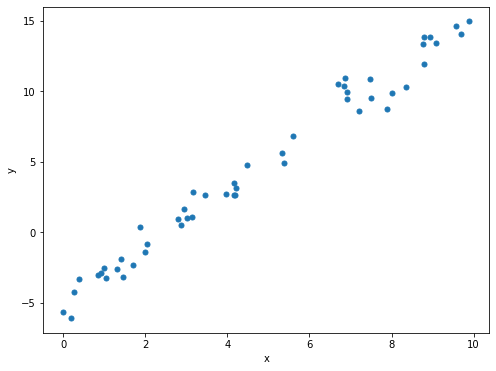

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=25);
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
df = pd.DataFrame( {'x' :x, 'y': y})
df

,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193
5,0.923386,-2.918812
6,1.862602,0.385006
7,3.455607,2.653259
8,3.967675,2.743514
9,5.388167,4.888706


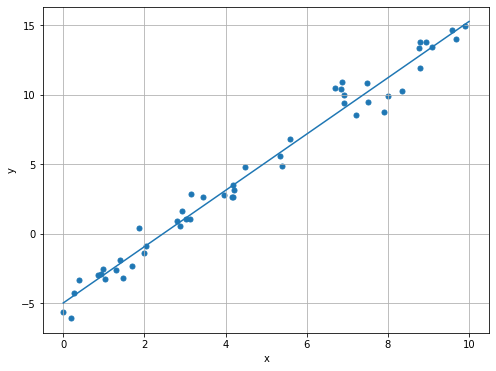

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1, 1), y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit.reshape(-1, 1))

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=25);
plt.plot(xfit, yfit);
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
print("coef a:", model.coef_)
print("coef b:",model.intercept_)

coef a: [2.02720881]
coef b: -4.998577085553204


## More features

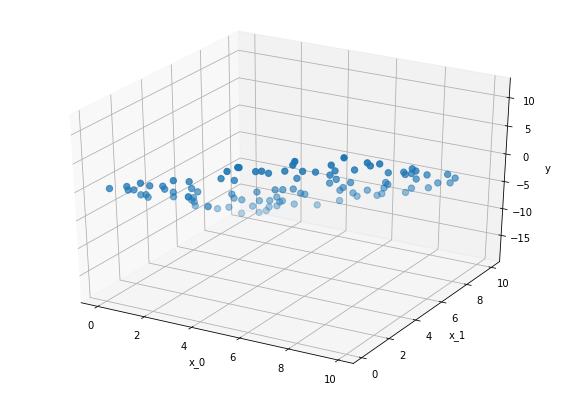

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.])

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:,0],X[:,1],y, marker='o', s=40, depthshade=True);
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
plt.show()

In [ ]:
df = pd.DataFrame( {'x0' :X[:,0], 'x1' :X[:,1], 'y': y})
df

,x0,x1,y
0,4.170220,7.203245,-7.651160
1,0.001144,3.023326,-5.544936
2,1.467559,0.923386,0.854566
3,1.862602,3.455607,-3.617311
4,3.967675,5.388167,-4.324823
...,...,...,...
95,2.632968,0.659611,3.130230
96,7.350660,7.721780,-3.917571
97,9.078159,9.319721,-4.522204
98,0.139516,2.343621,-3.977968


0.4999999999999991
[ 1.5 -2. ]


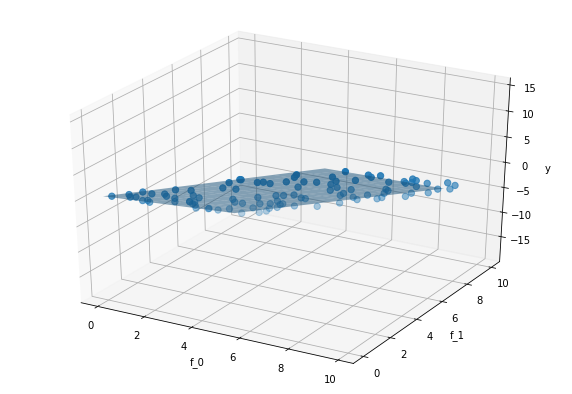

In [ ]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)
a0, a1 = model.coef_

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:,0],X[:,1],y, marker='o', s=40, depthshade=True);
xx, yy = np.meshgrid(range(10), range(10))
z = a0 * xx + a1 * yy + model.intercept_
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.set_xlabel('f_0')
ax.set_ylabel('f_1')
ax.set_zlabel('y')
plt.show()

## Polynomial features

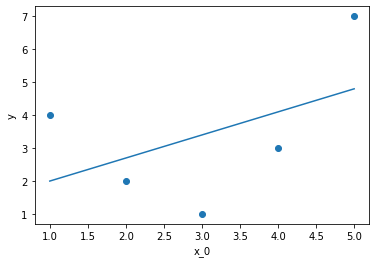

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.xlabel("x_0")
plt.ylabel("y")
plt.plot(x, yfit);

In [ ]:
df = pd.DataFrame( {'x0' :x, 'y': y})
df

,x0,y
0,1,4
1,2,2
2,3,1
3,4,3
4,5,7


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


In [ ]:
df = pd.DataFrame( {'x0' :X2[:,0], 'x1' :X2[:,1], 'y': y})
df

,x0,x1,y
0,1.0,1.0,4
1,2.0,4.0,2
2,3.0,9.0,1
3,4.0,16.0,3
4,5.0,25.0,7


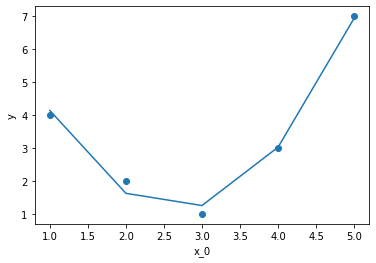

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);
plt.xlabel("x_0")
plt.ylabel("y")
plt.show()

In [ ]:
model.coef_

array([-5.72857143,  1.07142857])

In [ ]:
model.intercept_

8.799999999999988

## Adionando mais colunas usando a transformação polinomial

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X4 = poly.fit_transform(X)
df = pd.DataFrame( {'x0' :X4[:,0], 'x1' :X4[:,1], 'x2' :X4[:,2], 'x3' :X4[:,3], 'y': y})
df

,x0,x1,x2,x3,y
0,1.0,1.0,1.0,1.0,4
1,2.0,4.0,8.0,16.0,2
2,3.0,9.0,27.0,81.0,1
3,4.0,16.0,64.0,256.0,3
4,5.0,25.0,125.0,625.0,7


## Exemplo

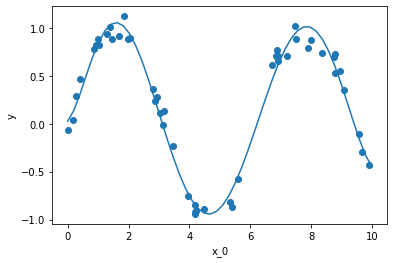

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly = PolynomialFeatures(7, include_bias=False)
X7 = poly.fit_transform(x.reshape(-1,1))

model = LinearRegression(fit_intercept=True)
model.fit(X7, y)

xfit = np.linspace(0, 10, 50)
X_fit = poly.transform(xfit.reshape(-1,1))

yfit = model.predict(X_fit)

plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.xlabel("x_0"); plt.ylabel("y")
plt.show()

## Mesmo exemplo aumentando o degree para 15

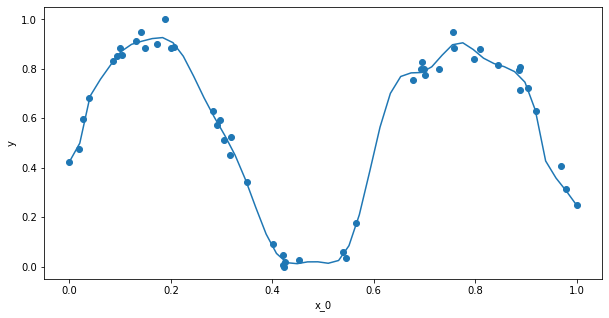

In [55]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly = PolynomialFeatures(30 , include_bias=False)
X7 = poly.fit_transform(x.reshape(-1, 1))

scl = MinMaxScaler()
X7 = scl.fit_transform(X7)
y = scl.fit_transform(y.reshape(-1, 1))

model = LinearRegression(fit_intercept=True)
model.fit(X7, y)

xfit = np.linspace(0, 1, 50)
X_fit = poly.transform(xfit.reshape(-1,1))
yfit = model.predict(X_fit)

plt.figure(figsize=(10,5))
plt.scatter(X7[:,0], y)
plt.plot(xfit, yfit);
plt.xlabel("x_0"); plt.ylabel("y")
plt.show()

## Exemplo com dataset

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, [2,3,8]]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

std_0 = StandardScaler()
diabetes_X_train = std_0.fit_transform(diabetes_X_train)
diabetes_X_test = std_0.transform(diabetes_X_test)

std_1 = StandardScaler()
diabetes_y_train = std_1.fit_transform(diabetes_y_train.reshape(-1, 1))
diabetes_y_test = std_1.transform(diabetes_y_test.reshape(-1, 1))

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print('Mean squared error: %.2f'
#     % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
    % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.57


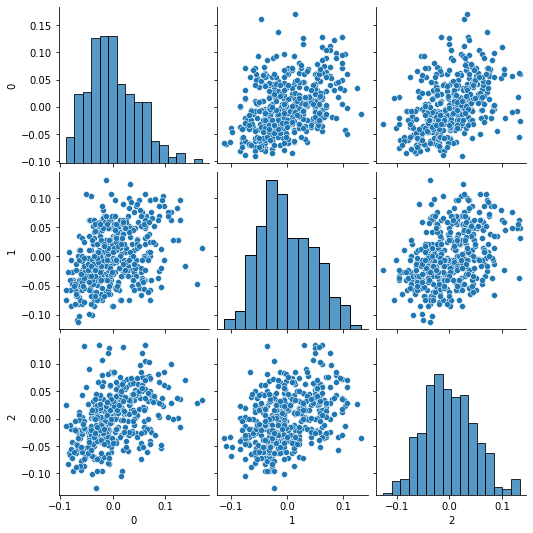

In [ ]:
df = pd.DataFrame(diabetes_X)
sns.pairplot(df)
plt.show()


## Regularização L2 (Ridge)

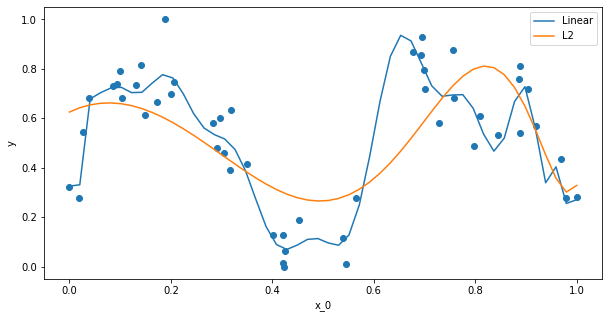

In [87]:
from sklearn.linear_model import Ridge

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.4 * rng.randn(50)

poly = PolynomialFeatures(20, include_bias=False)
X = poly.fit_transform(x.reshape(-1,1))

scl = MinMaxScaler()
X = scl.fit_transform(X)
y = scl.fit_transform(y.reshape(-1, 1))

model1 = LinearRegression(fit_intercept=True)
model1.fit(X, y)

model2 = Ridge(alpha=0.002)
model2.fit(X, y)

xfit = np.linspace(0, 1, 50)
X_fit = poly.transform(xfit.reshape(-1,1))
yfit1 = model1.predict(X_fit)
yfit2 = model2.predict(X_fit)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], y)
plt.plot(X_fit[:,0], yfit1, label='Linear');
plt.plot(X_fit[:,0], yfit2, label='L2');
plt.xlabel("x_0"); plt.ylabel("y")
plt.legend()
plt.show()

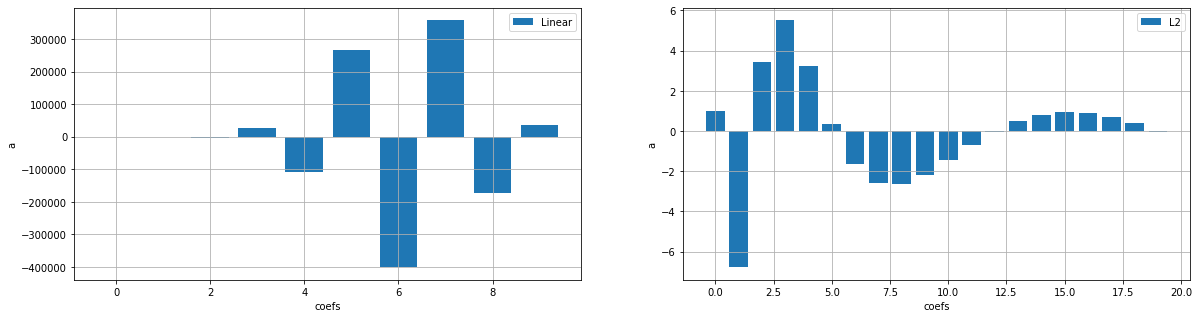

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(range(len(model1.coef_[0])),model1.coef_[0], label='Linear')
plt.xlabel("coefs"); plt.ylabel("a")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.bar(range(len(model2.coef_[0])),model2.coef_[0], label='L2')
plt.xlabel("coefs"); plt.ylabel("a")
plt.grid()
plt.legend()
plt.show()

## Regularização L1 (Lasso)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2636841715848879, tolerance: 0.00034613694040239304
  positive)


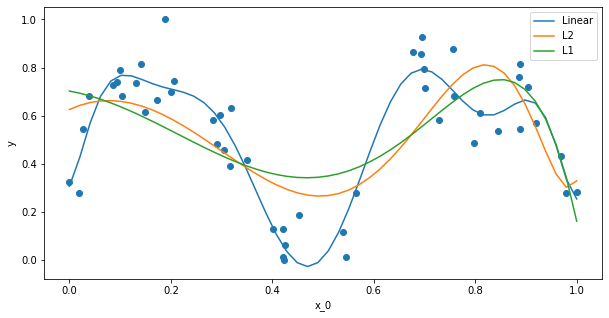

In [89]:
from sklearn.linear_model import Lasso

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.4 * rng.randn(50)

poly = PolynomialFeatures(10, include_bias=False)
X = poly.fit_transform(x.reshape(-1,1))

scl = MinMaxScaler()
X = scl.fit_transform(X)
y = scl.fit_transform(y.reshape(-1, 1))

model1 = LinearRegression(fit_intercept=True)
model1.fit(X, y)

model3 = Lasso(alpha=0.0002)
model3.fit(X, y)

xfit = np.linspace(0, 1, 50)
X_fit = poly.transform(xfit.reshape(-1,1))

yfit1 = model1.predict(X_fit)
yfit3 = model3.predict(X_fit)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], y)
plt.plot(X_fit[:,0], yfit1, label='Linear');
plt.plot(X_fit[:,0], yfit2, label='L2');
plt.plot(X_fit[:,0], yfit3, label='L1');
plt.xlabel("x_0"); plt.ylabel("y")
plt.legend()
plt.show()

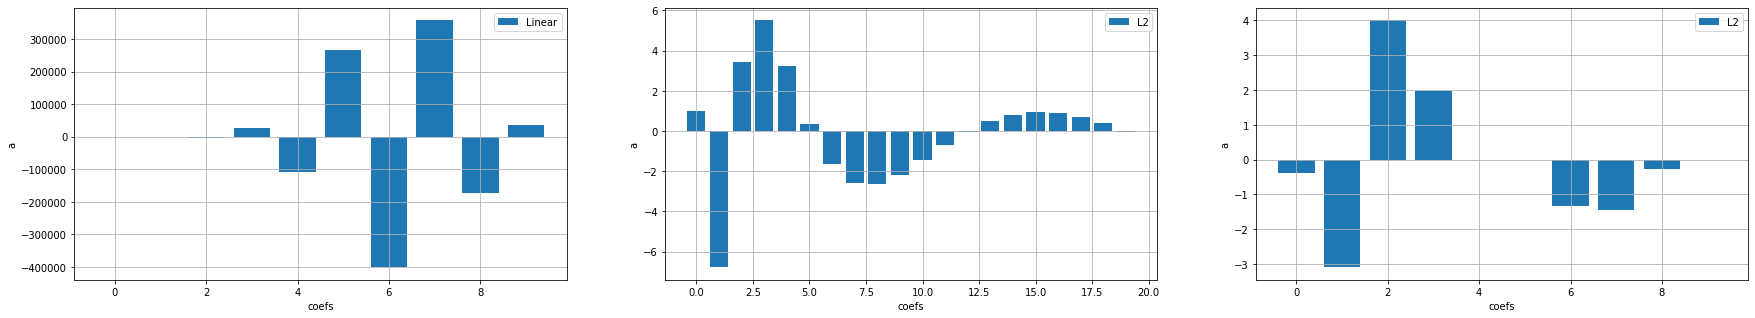

In [99]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.bar(range(len(model1.coef_[0])),model1.coef_[0], label='Linear')
plt.xlabel("coefs"); plt.ylabel("a")
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.bar(range(len(model2.coef_[0])),model2.coef_[0], label='L2')
plt.xlabel("coefs"); plt.ylabel("a")
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.bar(range(len(model3.coef_)),model3.coef_, label='L2')
plt.xlabel("coefs"); plt.ylabel("a")
plt.grid()
plt.legend()
plt.show()